In [1]:
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
@nb.njit(nb.float64(nb.float64, nb.float64, nb.float64))
def free_particle_density_matrix(x1, x2, beta):
    return 1/np.sqrt(2*np.pi) * np.exp(-0.5*(x1-x2)*(x1-x2)/beta)

In [3]:
beta = 4.0
nbpts = 10000
dtau = beta / nbpts
delta = 1.0
nsteps = 100000

In [5]:
x = np.zeros(nbpts)

for step in range(nsteps):
    k = np.random.randint(0, nbpts-1)
    knext, kprev = (k+1)%nbpts, (k-1)%nbpts
    x_new = x[k] + np.random.uniform(-delta, delta)
    old_weight = free_particle_density_matrix(x[kprev], x[k], dtau) * free_particle_density_matrix(x[k], x[knext], dtau) * np.exp(0.5*dtau*x[k]*x[k])
    new_weight = free_particle_density_matrix(x[kprev], x_new, dtau) * free_particle_density_matrix(x_new, x[knext], dtau) * np.exp(0.5*dtau*x_new*x_new)
    if np.random.uniform(0, 1) < new_weight / old_weight:
        x[k] = x_new

(array([1.900e+01, 6.500e+01, 2.350e+02, 3.890e+02, 8.839e+03, 3.040e+02,
        1.180e+02, 2.400e+01, 5.000e+00, 2.000e+00]),
 array([-0.04339349, -0.03302158, -0.02264967, -0.01227776, -0.00190585,
         0.00846606,  0.01883797,  0.02920988,  0.03958179,  0.0499537 ,
         0.06032561]),
 <BarContainer object of 10 artists>)

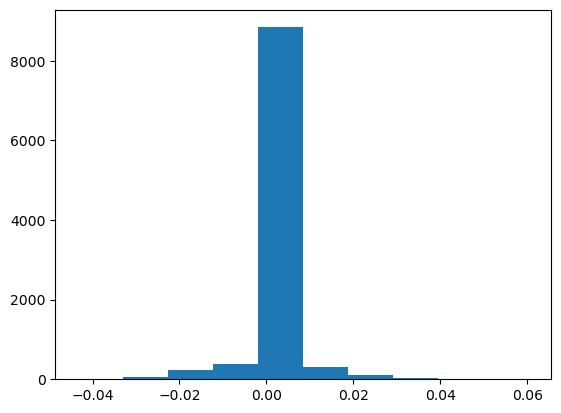

In [6]:
plt.hist(x)